In [29]:
from keras.models import model_from_json
import os
from hyperparms import BATCH_SIZE,TIME_STEPS,FEATURES_COUNT,EPOCH,ITERATIONS,LSTM_UNITS,LEARNING_RATE,DROPOUT_SIZE,SUBJECT
import pandas as pd
from utils import normalize_dataframe, denormalize, diff_to_percent, create_dataset, adjust_index, remove_str_from_row
import matplotlib.pyplot as plt
import numpy as np

In [30]:
BATCH_SIZE = 30
TIME_STEPS = 60

os.chdir('C:\\Users\\kbj20\\OneDrive\\바탕 화면\\trading')

stock = pd.read_csv('stock\\1\\{s}.csv'.format(s=SUBJECT))
stock.columns = ['Date', 'Close','Open', 'High', 'Low', 'Volume', 'IndividualBuying','ForeignerBuying','InstitutionBuying', 'ForeignerHolding', 'InstitutionHolding', 'Diff','Change' ]
stock = stock.set_index('Date').dropna()
_stock = stock.copy()
stock['Diff'] = [d[-2] * -1 if d[-1] == 'FALL' or d[-1] == 'LOWER_LIMIT' else d[-2] for d in stock.values ]
stock = stock.drop(['Change'], axis=1)
stock = stock.sort_index()
stock['Diff'] = diff_to_percent(stock)
stock = stock[['Diff','Open','High','Low','Volume', 'IndividualBuying', 'ForeignerBuying', 'InstitutionBuying', 'ForeignerHolding', 'InstitutionHolding','Close']]
stock = normalize_dataframe(stock)
stock = stock.fillna(method='ffill')

In [31]:
TEST_NUM = BATCH_SIZE * 10 + TIME_STEPS  # 250
TRAIN_NUM = int(len(stock)) - TEST_NUM * 2  # 1596
temp = TRAIN_NUM - BATCH_SIZE  # 1546
#print(TEST_NUM, TRAIN_NUM, temp)

train = stock[temp % BATCH_SIZE:-2 * TEST_NUM]
val = stock[-2 * TEST_NUM:-TEST_NUM]
test = stock[-TEST_NUM:]
#print(len(train), len(val), len(test))

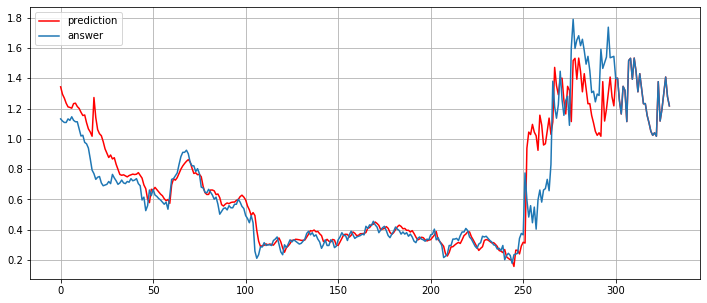

In [32]:
#x_train, y_train = create_dataset(train.to_numpy(), TIME_STEPS, FEATURES_COUNT)
#x_val, y_val = create_dataset(val.to_numpy(), TIME_STEPS, FEATURES_COUNT)
x_test, y_test = create_dataset(test.to_numpy(), TIME_STEPS, 10)

json_file = open('stock\\1\\1_bs30ts60ep10it50_model', 'r')
model = json_file.read()
model = model_from_json(model)
model.load_weights('stock\\1\\1_bs30ts60ep10it50_weight')


pred = model.predict(x_test, batch_size=BATCH_SIZE)
future = model.predict(x_test[-BATCH_SIZE:], batch_size=BATCH_SIZE)
plt.figure(figsize=(12, 5))
plt.plot(list(pred)+list(future), 'r', label="prediction")
plt.plot(list(y_test)+list(future), label="answer")
plt.grid(b=True, which='both', axis='both')
plt.legend()
plt.show()
plt.close()

In [35]:
print(len(pred), len(y_test))
print(test[np.where(test.index == '2019-03-06')[0][0]:])


300 300
                Diff      Open      High       Low      Volume  \
Date                                                             
2019-03-06 -0.909478  1.199052  1.158140  1.157895    6.569484   
2019-03-07 -0.960607  1.142180  1.116279  1.148325    5.467582   
2019-03-08 -0.973563  1.127962  1.106977  1.138756    2.581192   
2019-03-11 -1.000000  1.127962  1.102326  1.114833    3.560820   
2019-03-12 -1.066387  1.127962  1.111628  1.143541    2.234193   
...              ...       ...       ...       ...         ...   
2020-05-15 -1.089479  1.549763  1.646512  1.535885  311.915807   
2020-05-18 -1.462818  1.654028  1.730233  1.631579  487.924091   
2020-05-19 -0.560298  1.644550  1.674419  1.406699  297.680431   
2020-05-20 -1.011040  1.654028  1.627907  1.588517  113.689814   
2020-05-21 -1.011019  1.601896  1.590698  1.583732   80.299324   

            IndividualBuying  ForeignerBuying  InstitutionBuying  \
Date                                                             